# Akaike Information Criterion(AIC)
- 여러 차수의 모델들의 상대적인 quality를 평가하는 지표
  - sum of squared error(SSE)를 감소시키는 모델에 credit을 주고
  - 파라미터가 너무 많아지는 모델에 penalty를 주어서
  - AIC 점수 계산

## AIC 공식
$$AIC=-2\cdot \text{log}(maximum\ likelihood)+2\cdot (number\ of\ parameters\ in\ the\ model)$$
<br>
simple version (with order $p$)
$$AIC=\text{log}(\hat{\sigma}^2)+\frac{n+2\cdot p}{n}, \ \ \ \text{where } \hat{\sigma}^2 = \frac{SSE}{n}$$

##### 시뮬레이션 예시 
$$X_t=Z_t+0.7X_{t-1}-0.2X_{t-2}$$

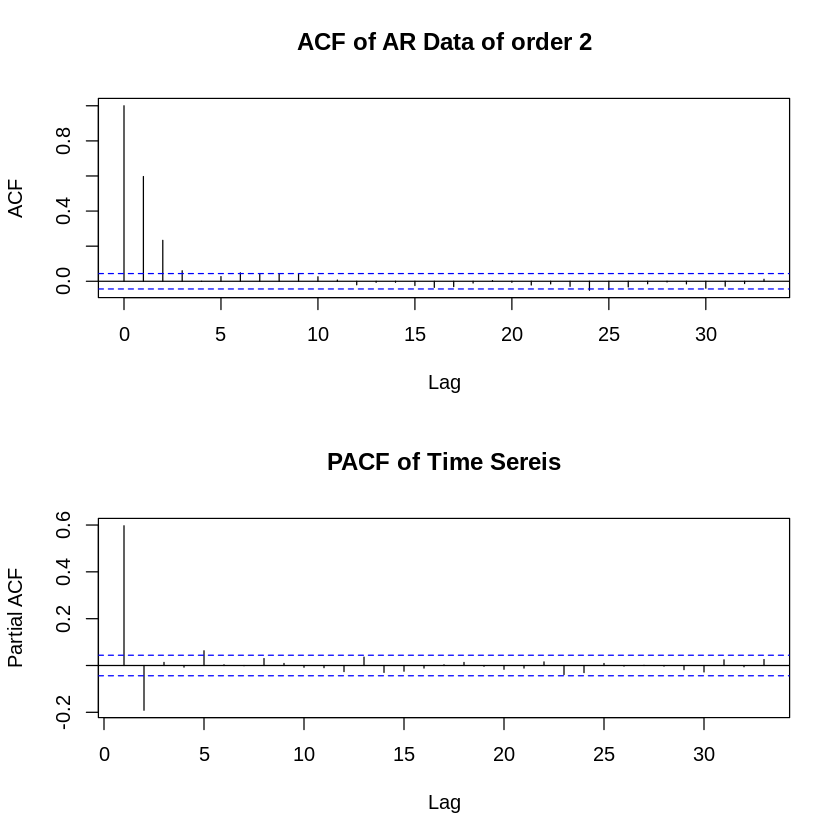

In [6]:
set.seed(43) 
data=arima.sim(list(order=c(2,0,0), ar=c(0.7,-0.2)), n=2000)

par(mfrow=c(2,1))
acf(data, main='ACF of AR Data of order 2')
acf(data, type='partial', main='PACF of Time Sereis')

=> 예시 모델이 AR(2)인 것 알고 있어서 p=2가 맞지만, PACF 보면 p=2, p=3 중에 뭐가 더 좋은 모델인지 헷갈릴 수 있음 

```arima()``` 명령어 통해서 aic 값 확인 가능

In [6]:
arima(data, order=c(2,0,0), include.mean=FALSE)


Call:
arima(x = data, order = c(2, 0, 0), include.mean = FALSE)

Coefficients:
         ar1      ar2
      0.7111  -0.1912
s.e.  0.0219   0.0220

sigma^2 estimated as 0.9985:  log likelihood = -2836.64,  aic = 5679.27

=> 여러 $p$ 후보에 대해서 aic 확인 후 order $p$ 정하면 됨
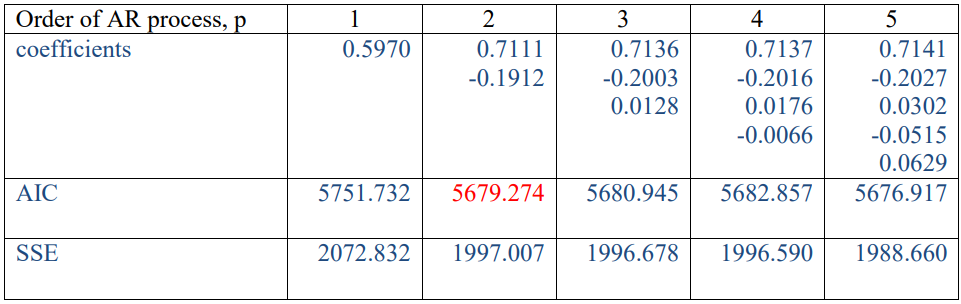

In [7]:
arima(data, order=c(1,0,0), include.mean=FALSE )
arima(data, order=c(2,0,0), include.mean=FALSE )
arima(data, order=c(3,0,0), include.mean=FALSE )
arima(data, order=c(4,0,0), include.mean=FALSE )
arima(data, order=c(5,0,0), include.mean=FALSE )


Call:
arima(x = data, order = c(1, 0, 0), include.mean = FALSE)

Coefficients:
         ar1
      0.5970
s.e.  0.0179

sigma^2 estimated as 1.036:  log likelihood = -2873.87,  aic = 5751.73


Call:
arima(x = data, order = c(2, 0, 0), include.mean = FALSE)

Coefficients:
         ar1      ar2
      0.7111  -0.1912
s.e.  0.0219   0.0220

sigma^2 estimated as 0.9985:  log likelihood = -2836.64,  aic = 5679.27


Call:
arima(x = data, order = c(3, 0, 0), include.mean = FALSE)

Coefficients:
         ar1      ar2     ar3
      0.7136  -0.2003  0.0128
s.e.  0.0224   0.0271  0.0224

sigma^2 estimated as 0.9983:  log likelihood = -2836.47,  aic = 5680.94


Call:
arima(x = data, order = c(4, 0, 0), include.mean = FALSE)

Coefficients:
         ar1      ar2     ar3      ar4
      0.7137  -0.2016  0.0176  -0.0066
s.e.  0.0224   0.0275  0.0275   0.0224

sigma^2 estimated as 0.9983:  log likelihood = -2836.43,  aic = 5682.86


Call:
arima(x = data, order = c(5, 0, 0), include.mean = FALSE)

Coefficients:
         ar1      ar2     ar3      ar4     ar5
      0.7141  -0.2027  0.0302  -0.0515  0.0629
s.e.  0.0223   0.0274  0.0278   0.0274  0.0223

sigma^2 estimated as 0.9943:  log likelihood = -2832.46,  aic = 5676.92

※ order $p$별 SSE, AIC 그래프

In [8]:
SSE=NULL
AIC=NULL
for (p in 1:5) {
m = arima(data, order=c(p,0,0), include.mean=FALSE )
SSE[p] = sum(resid(m)^2)
AIC[p] = m$aic

print( m$coef )
print( paste(m$aic, sum(resid(m)^2)) )
}

      ar1 
0.5969948 
[1] "5751.73196762524 2072.83193501059"
       ar1        ar2 
 0.7111457 -0.1911552 
[1] "5679.27375222458 1997.00667996082"
        ar1         ar2         ar3 
 0.71359315 -0.20027406  0.01281966 
[1] "5680.94495534325 1996.6779150665"
         ar1          ar2          ar3          ar4 
 0.713676751 -0.201599654  0.017553042 -0.006629412 
[1] "5682.85704377107 1996.58997810832"
        ar1         ar2         ar3         ar4         ar5 
 0.71410825 -0.20268672  0.03019322 -0.05154692  0.06293048 
[1] "5676.91730818182 1988.65973372245"


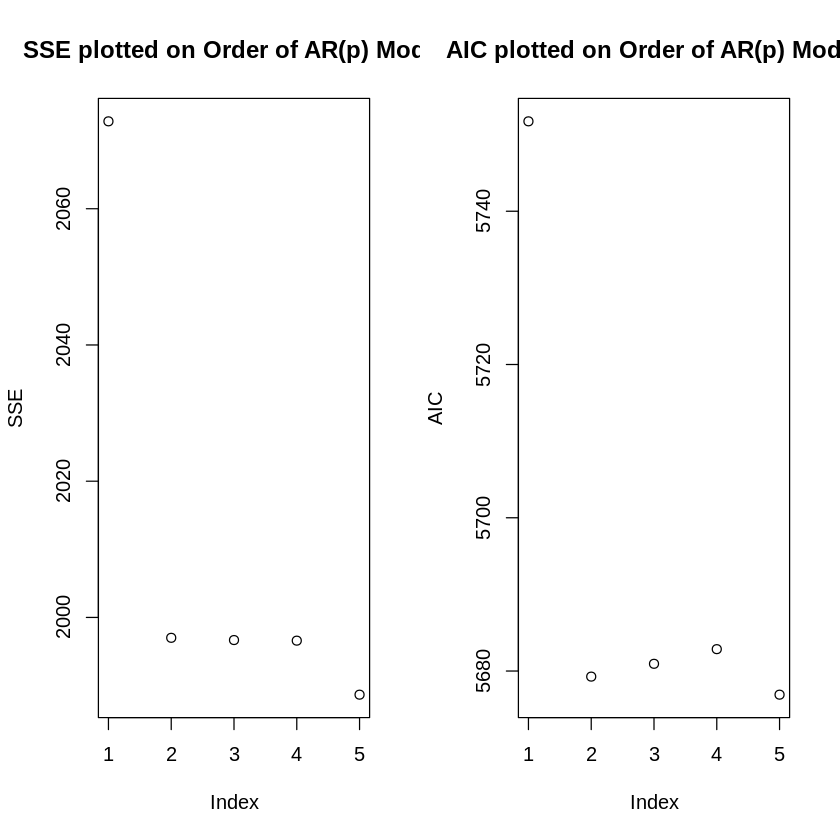

In [12]:
par(mfrow=c(1,2))
plot(SSE, main='SSE plotted on Order of AR(p) Model')
plot(AIC, main='AIC plotted on Order of AR(p) Model')

=> $p=2$에서 SSE가 급감하고 이후에는 큰 차이가 없지만 $p$가 커질수록 파라미터는 증가하기 때문에 $p=2$가 가장 효율적 모델